I have implemented it from scratch using numpy, by finding covariance matrix, eigen values and vectors, and then projecting the data onto the new basis. But sklearn is much faster and efficient. 


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gzip

Firstly I am loading the data

In [108]:
class_lab = pd.read_csv("../data/class.tsv", header=None, names=["Class"])["Class"]
columns_df = pd.read_csv("../data/columns.tsv.gz", sep="\t", comment="#")
gene_ids = columns_df.set_index("GeneSymbol").loc[["XBP1", "GATA3"]]["ID"].astype(str).tolist()

Load filtered gene expression data

In [109]:
with gzip.open("../data/filtered.tsv.gz", "rt") as f:
    exp_df = pd.read_csv(f, sep="\t")

exp_df.columns = exp_df.columns.str.strip()


Then extract expression levels for XBP1 and GATA3 is done

In [110]:
selexp = exp_df[gene_ids].copy()
selexp.columns = ["XBP1", "GATA3"]


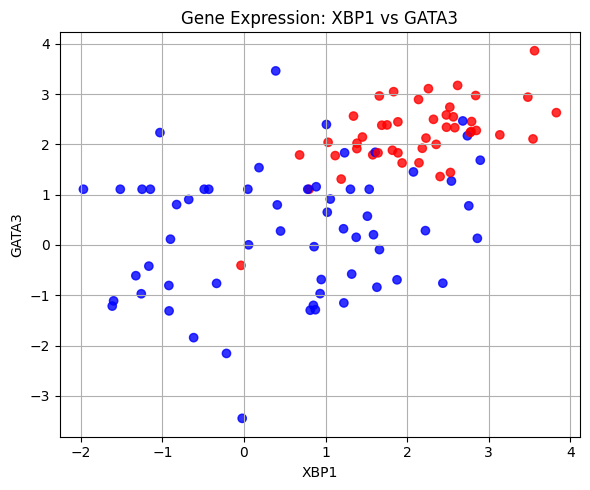

In [111]:
plt.figure(figsize=(6, 5))
colors = class_lab.map({1: "red", 0: "blue"})
plt.scatter(selexp["XBP1"], selexp["GATA3"], c=colors, alpha=0.8)
plt.xlabel("XBP1")
plt.ylabel("GATA3")
plt.title("Gene Expression: XBP1 vs GATA3")
plt.grid(True)
plt.tight_layout()
plt.show()


Now I am going to perform PCA on the filtered gene expression data

In [112]:
pca = PCA(n_components=1)
pc1 = pca.fit_transform(selexp)


1D projection plot

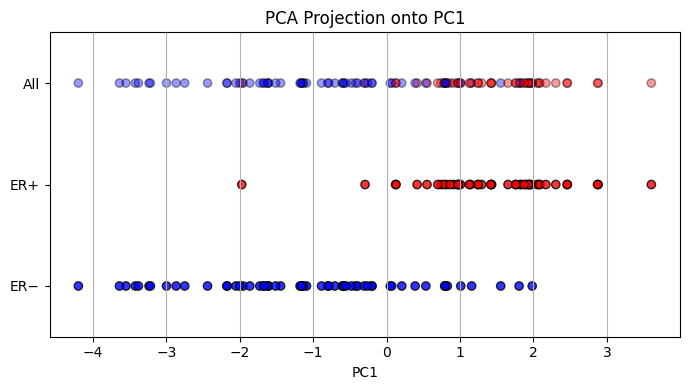

In [113]:
y_offsets = class_lab.values 
y_all = [2] * len(pc1)
plt.figure(figsize=(7, 4))
plt.scatter(pc1, y_offsets, c=colors, alpha=0.8, edgecolor='k', label='ER− / ER+')
plt.scatter(pc1, y_all, c=colors, alpha=0.4, edgecolor='k', label='All')
plt.yticks([0, 1, 2], ["ER−", "ER+", "All"])
plt.ylim(-0.5, 2.5)
plt.xlabel("PC1")
plt.title("PCA Projection onto PC1")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


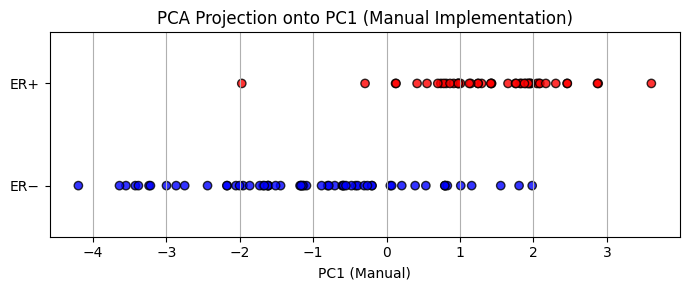

In [114]:
newdata = selexp - np.mean(selexp, axis=0)


# Firstly I am finding the covariance matrix and then the eigenvalues and eigenvectors via numpy
cov_matrix = np.cov(newdata.T)
eval,evt = np.linalg.eig(cov_matrix)

# Then I sorted eigenvalues and got the corresponding eigenvectors
sorted_indices = np.argsort(eval)[::-1]
eval = eval[sorted_indices]
evt = evt[:, sorted_indices]

# Then at last I am projecting the data onto the first principal component - the one with the largest eigenvalue
pc1_k = newdata @ evt[:, 0]
pc1_k = -pc1_k

plt.figure(figsize=(7, 3))
plt.scatter(pc1_k, y_offsets, c=colors, alpha=0.8, edgecolor='k')
plt.yticks([0, 1], ["ER−", "ER+"])
plt.ylim(-0.5, 1.5)
plt.xlabel("PC1 (Manual)")
plt.title("PCA Projection onto PC1 (Manual Implementation)")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()